In [68]:
import numpy as np

In [69]:
import pandas as pd
%matplotlib inline


In [70]:
#Read in both parts of the Titanic dataset
my_df_1 = pd.read_csv("Titanic.csv")
my_df_2 = pd.read_csv("Titanic_II.csv")

print(my_df_1.shape)
print(my_df_2.shape)

(891, 12)
(418, 12)


In [71]:
my_df_2.shape

(418, 12)

In [72]:
# Get column names of your dataframe

print(my_df_1.columns)
print(my_df_2.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [73]:
# Merge the two dataframes into the same dataframe using append

merged_df = my_df_1.append(my_df_2)
merged_df.shape

(1309, 12)

In [74]:
#Merge the two dataframes into the same dataframe using concat

df_list = [my_df_1,my_df_2]
merged_df_2 = pd.concat(df_list, axis = 0)
merged_df_2.shape

(1309, 12)

In [75]:
# Write out the merged dataframe as a .csv file

merged_df.to_csv("merged_data.csv",index = False)


In [76]:
# How can we define our own function and make new columns with derived data

def child_age(x):
    if x < 12:
        return "Child"
    elif x>12:
        return "Adult"
    else:
        return "unknown"

merged_df["Status"] = merged_df["Age"].apply(child_age)

merged_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [77]:
merged_df[["Age","Status"]].head(n =7)

,Age,Status
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
5,NaN,unknown
6,54.0,Adult


In [78]:
# How to make summary statistics of a column
merged_df["Fare"].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [79]:
# Make a dataframe by joining lists of data

Names = ["Jason","Laura","Johnson","Meuller","Anna"]

City = ["Seattle","San Francisco", "Portland", "Santa Cruz", "Athens"]

State = ["Washington", "California", "Oregon", "California", "Georgia"]

Income = [70000,80000,105000,45000,90000]

our_df = pd.DataFrame({"Name": Names, "City": City, 
                       "State": State, "Annual Income": Income})

our_df.head()

,Name,City,State,Annual Income
0,Jason,Seattle,Washington,70000
1,Laura,San Francisco,California,80000
2,Johnson,Portland,Oregon,105000
3,Meuller,Santa Cruz,California,45000
4,Anna,Athens,Georgia,90000


In [80]:
# Find and replace in our dataframe

rep_df = our_df.replace(to_replace = "California",
                        value = "CA",inplace = False)

rep_df.head()


,Name,City,State,Annual Income
0,Jason,Seattle,Washington,70000
1,Laura,San Francisco,CA,80000
2,Johnson,Portland,Oregon,105000
3,Meuller,Santa Cruz,CA,45000
4,Anna,Athens,Georgia,90000


In [81]:
our_df.head()

,Name,City,State,Annual Income
0,Jason,Seattle,Washington,70000
1,Laura,San Francisco,California,80000
2,Johnson,Portland,Oregon,105000
3,Meuller,Santa Cruz,California,45000
4,Anna,Athens,Georgia,90000


<AxesSubplot:xlabel='City'>

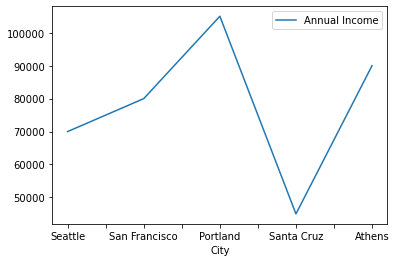

In [82]:
rep_df.plot(x = "City", y = "Annual Income", kind = "line")

# Drill Time !

Write a function that takes as input the fare, and if it's below 10, outputs "inexpensive", and if it's above 10 returns "expensive". Use this function to add a new column "Fare status" to your dataframe

In [83]:
def cal_fare(x):
    if x < 10:
        return 'inexpensive'
    else:
        return 'expensive'
    
merged_df['Fare status'] = merged_df["Fare"].apply(cal_fare)
merged_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Fare status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,inexpensive
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,expensive
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,inexpensive
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,expensive
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,inexpensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,unknown,inexpensive
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Adult,expensive
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Adult,inexpensive
416,1308,1,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,unknown,inexpensive


Get all column names of your new dataframe

In [84]:
merged_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Status',
       'Fare status'],
      dtype='object')

Write this dataframe to disk as a csv file

In [85]:
merged_df.to_csv("updated_df.csv")

Calculate summary statistics for the age column of your dataframe. What is the mean age ?

In [86]:
print(merged_df['Age'].describe())
print(merged_df['Age'].mean())

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64
29.881137667304014


What is the average age of passengers who travelled first class ?

In [87]:
merged_df['Age'][merged_df['Pclass']==1].mean()

39.15992957746479

What is the average fare paid by passengers who travelled first class ?

In [88]:
merged_df["Fare"][merged_df['Pclass']==1].mean()

87.50899164086688

Replace male by M and female by F in the dataframe

In [89]:
def check_gender(x):
    if x == 'male':
        return 'M'
    else:
        return 'F'

merged_df["Sex"] = merged_df['Sex'].apply(check_gender)
merged_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Fare status
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,inexpensive
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,Adult,expensive
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,inexpensive
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Adult,expensive
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S,Adult,inexpensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",M,NaN,0,0,A.5. 3236,8.0500,NaN,S,unknown,inexpensive
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",F,39.0,0,0,PC 17758,108.9000,C105,C,Adult,expensive
415,1307,0,3,"Saether, Mr. Simon Sivertsen",M,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Adult,inexpensive
416,1308,1,3,"Ware, Mr. Frederick",M,NaN,0,0,359309,8.0500,NaN,S,unknown,inexpensive


Scatter plot fares against passenger Age

<AxesSubplot:xlabel='Name'>

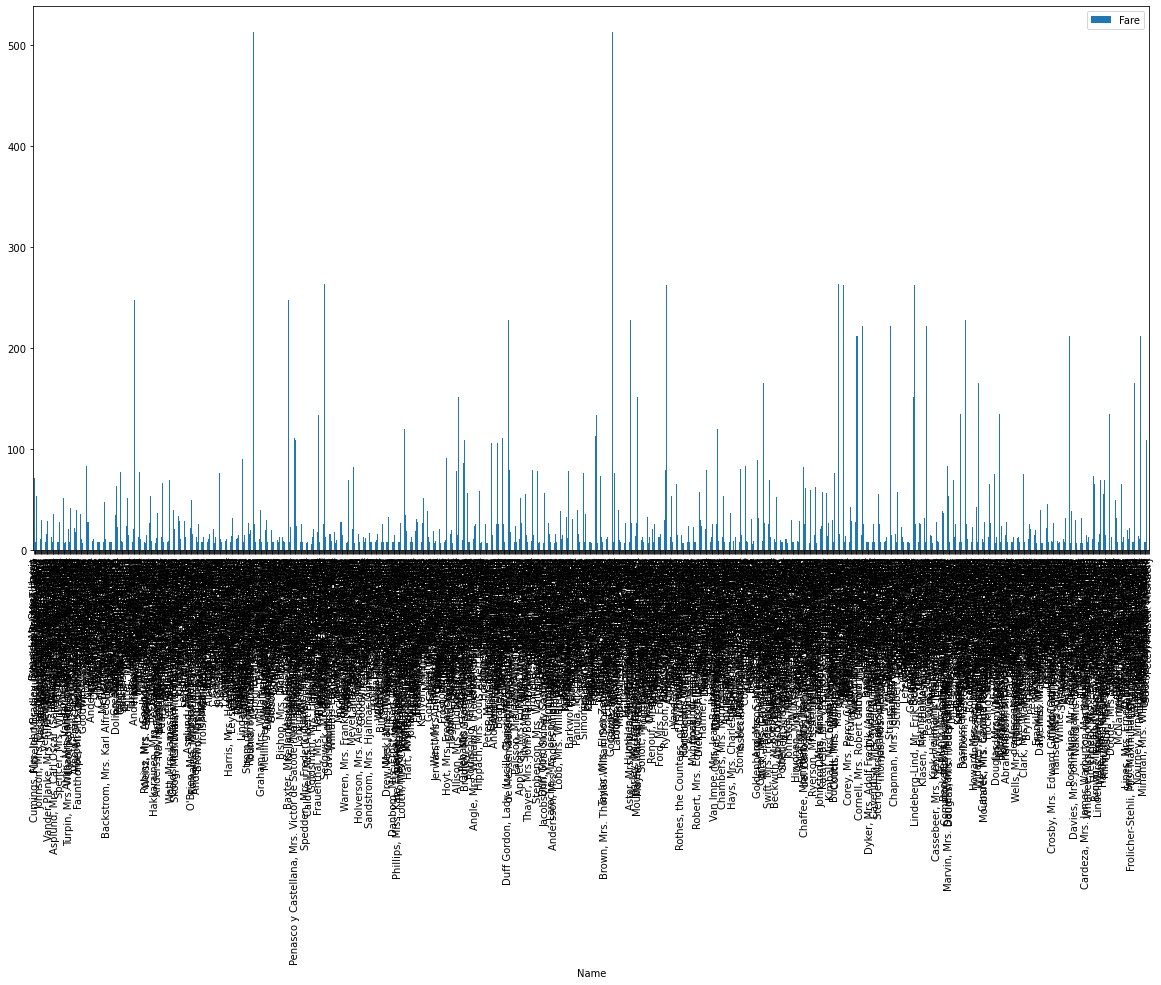

In [90]:
merged_df.plot(x = "Name", y = "Fare", kind = "bar", figsize = (20,10))